In [1]:
%pip install tensorflow
%pip install numpy
%pip install pandas


Note: you may need to restart the kernel to use updated packages.
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 640.0 kB/s eta 0:00:19
    --------------------------------------- 0.2/11.6 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.3/11.6 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.6 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.6 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.6 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.6 MB 5.2 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/11.6 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.6 MB 5.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.6 MB 5.8 MB/s eta 0:00:02
   --------- -------------

In [2]:

%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.3 kB 1.3 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 1.9 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 7.5 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.6 MB 4.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.6 MB 4.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/7.6 MB 3.9 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.6 MB 4.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.6 MB 4.7 MB/s eta 0:00:02
   ------- ---------------------

In [3]:

%pip install scikit-learn
%pip install seaborn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 635.5 kB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.8 MB/s eta 0:00:03
    --------------------------------------- 0.1/10.6 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.6 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.6 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.6 MB 2.6 MB/s eta 0:00:04
   --- ---------------

In [5]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [2]:
dataset = pd.read_json("data_without_hashtags.json")
dataset.head()

,text,isSarcastic
0,@0430yes i hope youre lurking rn. i want to li...,0
1,05 really taught me a valuable lesson I'm neve...,0
2,"@098BERRY Never had a voice to protest, so you...",0
3,@0hMySt4rs Rest in peace & love to you and you...,0
4,100 days until Christmas! 🌲 #too soon ready yet,0


In [3]:
import pandas as pd

# Read the dataset
dataset = pd.read_json("data_without_hashtags.json")

# Get the number of rows in the dataset
num_rows = dataset.shape[0]

# Display the total number of rows
print("Total number of rows in the dataset:", num_rows)

Total number of rows in the dataset: 39780


In [4]:
import pandas as pd

# Read the dataset
#dataset = pd.read_json("data_without_hashtags.json")

# Assuming "is_sarcastic" is the column you're interested in
sarcastic_counts = dataset['isSarcastic'].value_counts()

# Display the result
print("Number of rows for each value in the 'isSarcastic' column:")
print(sarcastic_counts)

Number of rows for each value in the 'isSarcastic' column:
isSarcastic
0    21292
1    18488
Name: count, dtype: int64


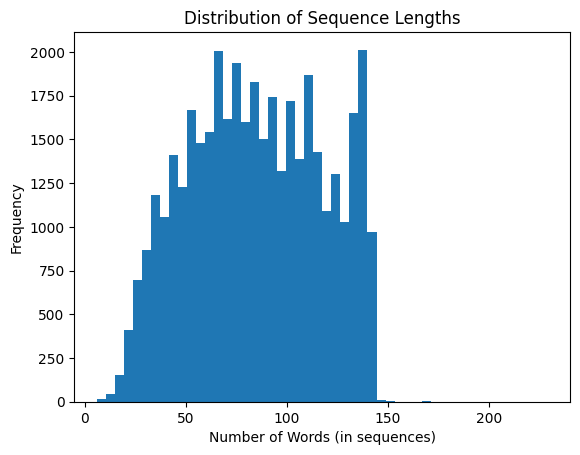

In [5]:
import matplotlib.pyplot as plt

text_data = dataset['text']

# Calculate sentence lengths
sentence_lengths = [len(sequence) for sequence in text_data]

# Plot histogram
plt.hist(sentence_lengths, bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Number of Words (in sequences)')
plt.ylabel('Frequency')
plt.show()

In [6]:
import numpy as np

# Calculate the 95th percentile
max_length_percentile = int(np.percentile(sentence_lengths, 95))
print(f"95th Percentile: {max_length_percentile}")

95th Percentile: 138


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
##from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Read the dataset
#dataset = pd.read_json("data_without_hashtags.json")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['isSarcastic'], test_size=0.2, random_state=42)

# Tokenize and vectorize the training text data using Tokenizer and pad_sequences
max_length = 138
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_length)

y_train_categorical = to_categorical(y_train, num_classes=2)

# Display the shapes of the resulting matrices
print("Shape of X_train:", X_train.shape)

# Tokenize and vectorize the testing text data using the same Tokenizer
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_length)

# Display the shape of X_test
print("Shape of X_test:", X_test.shape)

Shape of X_train: (31824, 138)
Shape of X_test: (7956, 138)


In [8]:
#original model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

embedding_dim = 100

# Define the vocabulary size based on the actual number of unique words in the training data
vocab_size = len(tokenizer.word_index) + 1

max_length = 138

m1 = Sequential()
m1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
m1.add(LSTM(units=150, dropout=0.3, recurrent_dropout=0.3))
m1.add(Dense(units=1, activation='sigmoid'))

m1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
m1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 138, 100)          3221100   
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 3,371,851
Trainable params: 3,371,851
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train the model
m1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = m1.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
498/498 [==============================] - 403s 804ms/step - loss: 0.5530 - accuracy: 0.7079 - val_loss: 0.4787 - val_accuracy: 0.7662
Epoch 2/10
498/498 [==============================] - 405s 814ms/step - loss: 0.3726 - accuracy: 0.8345 - val_loss: 0.4958 - val_accuracy: 0.7676
Epoch 3/10
498/498 [==============================] - 405s 814ms/step - loss: 0.2630 - accuracy: 0.8901 - val_loss: 0.5403 - val_accuracy: 0.7643
Epoch 4/10
498/498 [==============================] - 399s 801ms/step - loss: 0.1938 - accuracy: 0.9213 - val_loss: 0.6135 - val_accuracy: 0.7529
Epoch 5/10
498/498 [==============================] - 400s 804ms/step - loss: 0.1523 - accuracy: 0.9397 - val_loss: 0.7038 - val_accuracy: 0.7486
Epoch 6/10
498/498 [==============================] - 401s 805ms/step - loss: 0.1225 - accuracy: 0.9518 - val_loss: 0.8159 - val_accuracy: 0.7443
Epoch 7/10
498/498 [==============================] - 404s 812ms/step - loss: 0.1042 - accuracy: 0.9577 - val_loss: 0.9104 -

In [10]:
from sklearn.metrics import precision_score, recall_score

# Predict on validation data
y_val_pred_prob_m1 = m1.predict(X_test)
y_val_pred_m1 = (y_val_pred_prob_m1 > 0.5).astype(int)  # Threshold for binary classification

# Assuming y_test is in binary format (0 or 1)
y_val_true_m1 = y_test

# Calculate precision and recall for binary classification
precision_m1 = precision_score(y_val_true_m1, y_val_pred_m1)
recall_m1 = recall_score(y_val_true_m1, y_val_pred_m1)

# print the results
print(f'Precision: {precision_m1:.4f}')
print(f'Recall: {recall_m1:.4f}')

249/249 [==============================] - 35s 139ms/step
Precision: 0.7104
Recall: 0.7349


In [11]:
# Function to preprocess user input and make a prediction
def predict_sarcasm(user_input, model, tokenizer, max_length, threshold=0.5):
    # Tokenize and preprocess user input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=max_length)

    # Make prediction
    prediction_prob = model.predict(user_input_padded)
    predicted_label = 1 if prediction_prob[0, 0] > threshold else 0

    return predicted_label, prediction_prob

# Example usage:
user_input = input("Enter a sentence: ")

# Call the predict_sarcasm function with a custom threshold (e.g., 0.3)
predicted_label, predicted_prob = predict_sarcasm(user_input, m1, tokenizer, max_length, threshold=0.3)

# Display the prediction
if predicted_label == 1:
    print("The model predicts that the input is sarcastic.")
else:
    print("The model predicts that the input is not sarcastic.")

# Optional: Display the predicted probabilities
print("Predicted Probabilities:", predicted_prob)
print("User input", user_input)

1/1 [==============================] - 1s 617ms/step
The model predicts that the input is sarcastic.
Predicted Probabilities: [[0.466415]]
User input thats crazy


In [24]:
# Save the Keras model
m1.save('model_trained.h5')

In [27]:
import keras
from keras.models import load_model



# Load the Keras model
mp = load_model('model_trained.h5')

# Function to preprocess user input and make a prediction
def predict_sarcasm(user_input, model, tokenizer, max_length, threshold=0.5):
    # Tokenize and preprocess user input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=max_length)

    # Make prediction
    prediction_prob = model.predict(user_input_padded)
    predicted_label = 1 if prediction_prob[0, 0] > threshold else 0

    return predicted_label, prediction_prob

# Example usage:
user_input = input("Enter a sentence: ")

# Call the predict_sarcasm function with a custom threshold (e.g., 0.3)
predicted_label, predicted_prob = predict_sarcasm(user_input, mp, tokenizer, max_length, threshold=0.3)

# Display the prediction
if predicted_label == 1:
    print("The model predicts that the input is sarcastic.")
else:
    print("The model predicts that the input is not sarcastic.")

# Optional: Display the predicted probabilities
print("Predicted Probabilities:", predicted_prob)
print("User input", user_input)


1/1 [==============================] - 0s 416ms/step
The model predicts that the input is not sarcastic.
Predicted Probabilities: [[0.24325545]]
User input that is crazy


In [18]:
import tensorflow as tf
print(tf.__version__)

import tensorflow.keras as keras
print(keras.__version__)


import pickle

# Load the pickled model
with open('model_trained.pkl', 'rb') as file:
    mp = pickle.load(file)


2.10.0
2.10.0


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://d1bd443e-cf24-4c5b-9009-4ce5cd6eccda/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.